In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [2]:
df = pd.read_csv("carz.csv")

In [3]:
df.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,4/18/2019,4/26/2019,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,6-Feb
1,1026101993,140,1.121444e+09,1/24/2019,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,6-Mar
2,1032382575,11,1.539893e+09,8/28/2018,9/4/2018,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,16-Jan
3,103627606,9,7.341951e+08,7/17/2018,8/1/2018,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,18-Feb
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,15-Jan


In this dataset, we are looking at the total amount of average total daily car traffic is present in each neighborhood from various sources. The neighborhood with the least car traffic will be considered the best neighborhood.

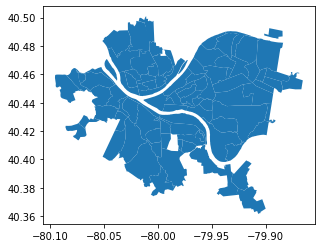

In [4]:
neigh = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neigh.plot()

<ipython-input-12-20841c67ad4f>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  beforefiltercars = df.groupby("neighborhood").sum()['average_daily_car_traffic'].replace(0, pd.np.nan).dropna()


Text(0, 0.5, 'Average cars per day')

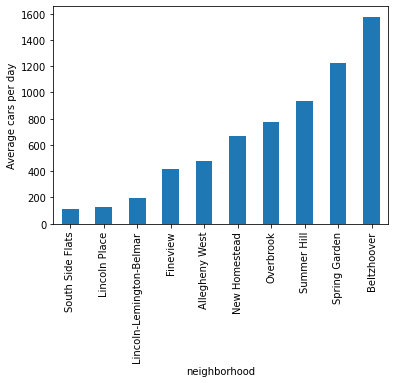

In [12]:
beforefiltercars = df.groupby("neighborhood").sum()['average_daily_car_traffic'].replace(0, pd.np.nan).dropna()
beforefiltercars.sort_values(ascending=True).head(10).plot(kind = "bar")
plt.ylabel("Average cars per day")

Text(0, 0.5, 'Average cars per day')

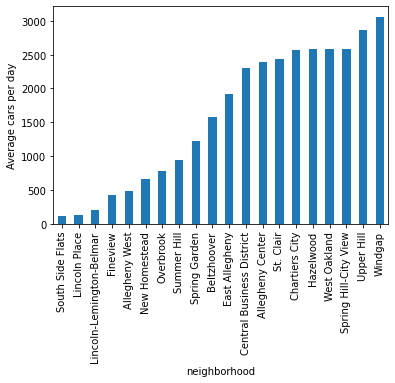

In [13]:
beforefiltercars.sort_values(ascending=True).head(20).plot(kind = "bar")
plt.ylabel("Average cars per day")

In [6]:
num_cars = df.groupby("neighborhood").sum()['average_daily_car_traffic'].replace(0, pd.np.nan).dropna()
num_cars.sort_values(ascending=True).head(10)

<ipython-input-6-f5d8a3c1ccc1>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  num_cars = df.groupby("neighborhood").sum()['average_daily_car_traffic'].replace(0, pd.np.nan).dropna()


neighborhood
South Side Flats             115.0
Lincoln Place                126.0
Lincoln-Lemington-Belmar     195.0
Fineview                     419.0
Allegheny West               477.0
New Homestead                666.0
Overbrook                    777.0
Summer Hill                  937.0
Spring Garden               1226.0
Beltzhoover                 1577.0
Name: average_daily_car_traffic, dtype: float64

These ten neighborhoods have the least average daily car traffic after filtering out neighborhoods with zero average daily car traffic.

As you can see in this bar graph of the first twenty neighborhoods sorted in ascending order, there are a few neighborhoods with low traffic but the amount of traffic starts to rapidly rise until around 2500. About half of the neighborhoods plotted here have around 2500 cars per day. 

From my data, I would conclude the best neighborhood is South Side Flats. It has the lowest average amount of cars per day compared to the other neighborhoods. 
Coming in close is Lincoln Place, which has a very similar amount of cars per day at 126.

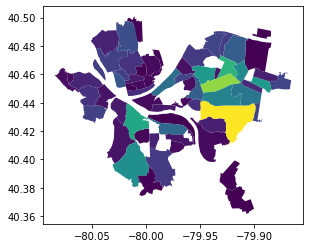

In [14]:
car_map = neigh.merge(num_cars, how='left', left_on='hood', right_on='neighborhood')
car_map[['hood','average_daily_car_traffic','geometry']].head()
car_map.plot(column='average_daily_car_traffic')

A visual representation of the car traffic, plotted on a map of Pittsburgh. The yellow indicates a high amount of traffic, whereas the dark navy or purple colors represent the lowest car traffic.